In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time

# 加载并查看数据

In [5]:
f=open('J:/文档e盘/深度学习/10 股票价格预测/10 股票价格预测/data_stocks.csv')
data=pd.read_csv(f)

In [6]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [8]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [12]:
print(time.strftime('%Y-%m-%d',time.localtime(data['DATE'].max())),
      time.strftime('%Y-%m-%d',time.localtime(data['DATE'].min())))

2017-09-01 2017-04-03


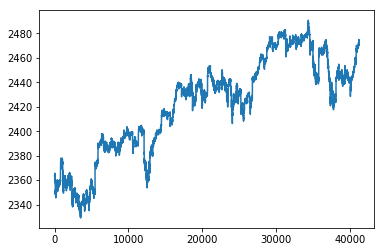

In [13]:
plt.plot(data['SP500'])
#要预测的这一列的曲线

# 数据集处理

In [ ]:
data.drop('DATE',axis=1,inplace=True)

In [32]:
data_train=data.iloc[:int(data.shape[0]*0.9),:]
data_test=data.iloc[int(data.shape[0]*0.9):,:]
print(data_train.shape,data_test.shape)

scaler=MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train=scaler.transform(data_train)
data_test=scaler.transform(data_test)

(37139, 501) (4127, 501)


MSE Train 0.45735177
MSE Test 0.5319297


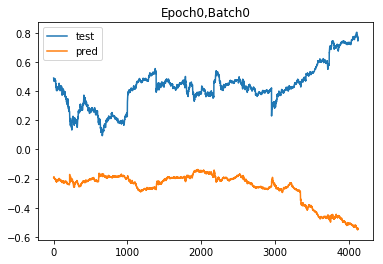

MSE Train 0.11132357
MSE Test 0.08069558


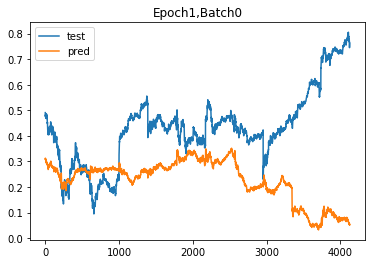

MSE Train 0.014461949
MSE Test 0.034431174


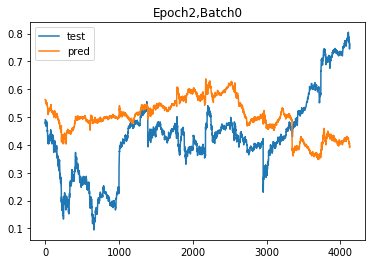

MSE Train 0.0045597544
MSE Test 0.033913832


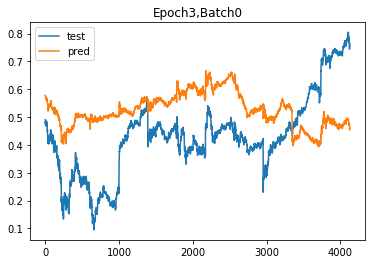

MSE Train 0.0025290472
MSE Test 0.026745802


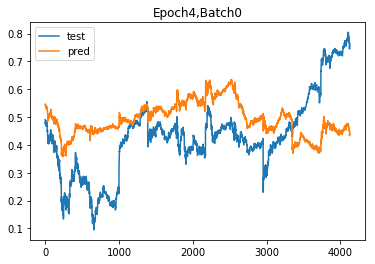

MSE Train 0.0017633918
MSE Test 0.023796013


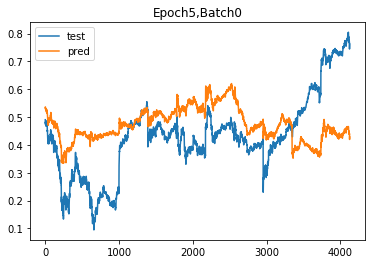

MSE Train 0.0013497854
MSE Test 0.022428168


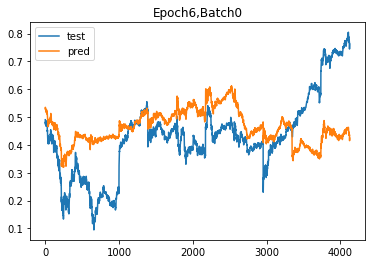

MSE Train 0.0010941977
MSE Test 0.021510035


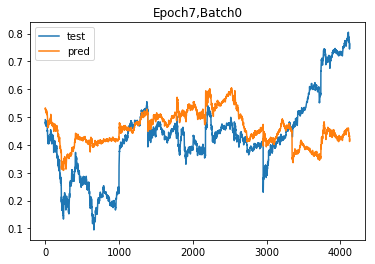

MSE Train 0.0009228495
MSE Test 0.02085947


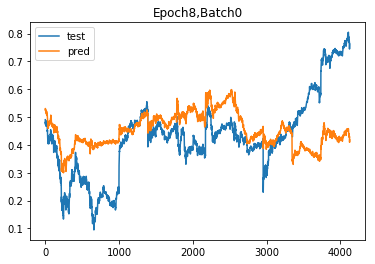

MSE Train 0.00080006063
MSE Test 0.020372778


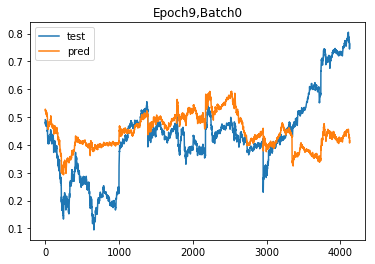

In [33]:
x_train = data_train[:,1:]
y_train = data_train[:,0]
x_test = data_test[:,1:]
y_test = data_test[:,0]

input_dim=x_train.shape[1]
output_dim=1
batch_size=128
epochs=10
hidden1=1024
hidden2=512
hidden3=256
hidden4=128

tf.reset_default_graph()

X=tf.placeholder(shape=[None,input_dim],dtype=tf.float32)
Y=tf.placeholder(shape=[None],dtype=tf.float32)

w1=tf.get_variable('w1',[input_dim,hidden1],initializer=tf.contrib.layers.
                   xavier_initializer(seed=1))
b1=tf.get_variable('b1',[hidden1],initializer=tf.zeros_initializer())

w2=tf.get_variable('w2',[hidden1,hidden2],initializer=tf.contrib.layers.
                   xavier_initializer(seed=1))
b2=tf.get_variable('b2',[hidden2],initializer=tf.zeros_initializer())

w3=tf.get_variable('w3',[hidden2,hidden3],initializer=tf.contrib.layers.
                   xavier_initializer(seed=1))
b3=tf.get_variable('b3',[hidden3],initializer=tf.zeros_initializer())

w4=tf.get_variable('w4',[hidden3,hidden4],initializer=tf.contrib.layers.
                   xavier_initializer(seed=1))
b4=tf.get_variable('b4',[hidden4],initializer=tf.zeros_initializer())

w5=tf.get_variable('W5',[hidden4,output_dim],initializer=tf.contrib.layers.
                     xavier_initializer(seed=1))
b5=tf.get_variable('b5',[output_dim],initializer=tf.zeros_initializer())

h1=tf.nn.relu(tf.add(tf.matmul(X,w1),b1))
h2=tf.nn.relu(tf.add(tf.matmul(h1,w2),b2))
h3=tf.nn.relu(tf.add(tf.matmul(h2,w3),b3))
h4=tf.nn.relu(tf.add(tf.matmul(h3,w4),b4))
output=tf.transpose(tf.add(tf.matmul(h4,w5),b5))

cost=tf.reduce_mean(tf.squared_difference(output,Y))
train=tf.train.AdadeltaOptimizer().minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epo in range(epochs):
        shuffle_indices=np.random.permutation(np.arange(y_train.shape[0]))
        x_train=x_train[shuffle_indices]
        y_train=y_train[shuffle_indices]
        for i in range(y_train.shape[0]//batch_size):
            start=i*batch_size
            batch_x=x_train[start:start+batch_size,:]
            batch_y=y_train[start:start+batch_size]
            sess.run(train,feed_dict={X:batch_x,Y:batch_y})
            
            if i%1000==0:
                print('MSE Train',sess.run(cost,feed_dict={X:x_train,Y:y_train}))
                print('MSE Test',sess.run(cost,feed_dict={X:x_test,Y:y_test}))
                y_pred=sess.run(output,feed_dict={X:x_test})
                y_pred=np.squeeze(y_pred)
                plt.plot(y_test,label='test')
                plt.plot(y_pred,label='pred')
                plt.title('Epoch'+str(epo)+',Batch'+str(i))
                plt.legend()
                plt.show()